In [1]:
import time
import numpy as np
import types
import os
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.special import zeta
import PRyM.PRyM_init as PRyMini
import PRyM.PRyM_thermo as PRyMthermo
import PRyM.test_main3 as test_main
#import PRyM.PRyM_jl_sys as PRyMjl
from numdifftools import Derivative
import PRyM.PRyM_eval_nTOp as PRyMevalnTOp
import PRyM.PRyM_nTOp as PRyMnTOp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
columns = [
    "Tend", "f","Neff", "Omeganurel", "OneOverOmeganunr",
    "YPCMB", "YPBBN", "DoHx1e5", "He3oHx1e5", "Li7oHx1e10"
]

# Read the space-separated file
df = pd.read_csv("results_grid.txt", delim_whitespace=True, comment="#", names=columns, skiprows=1)

/tmp/ipykernel_456665/3956829145.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("results_grid.txt", delim_whitespace=True, comment="#", names=columns, skiprows=1)


In [3]:
df.columns

Index(['Tend', 'f', 'Neff', 'Omeganurel', 'OneOverOmeganunr', 'YPCMB', 'YPBBN',
       'DoHx1e5', 'He3oHx1e5', 'Li7oHx1e10'],
      dtype='object')

In [4]:
def plot_heatmap(ax, x, y, z, title, vmin=None, vmax=None):
    # Convert to numpy arrays
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)

    # Infer grid shape
    x_unique = np.unique(x)
    y_unique = np.unique(y)
    nx = len(x_unique)
    ny = len(y_unique)

    # Reshape z
    sort_idx = np.lexsort((x, y))
    z_sorted = z[sort_idx].reshape(ny, nx)

    # Plot
    c = ax.imshow(z_sorted,
                  extent=[x.min(), x.max(), y.min(), y.max()],
                  origin='lower',
                  aspect='auto',
                  vmin=vmin,
                  vmax=vmax)

    ax.set_xscale('log')

    
    return c

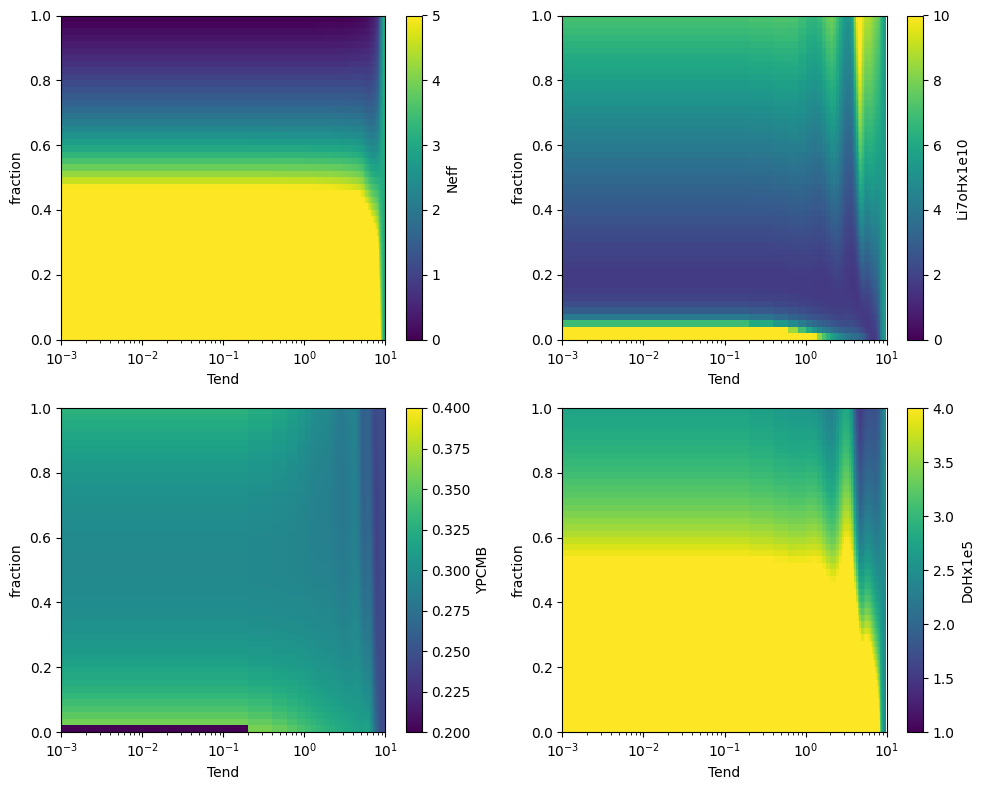

In [5]:
# Create four different (x, y) grids
x1 = df['Tend'].tolist()
y1 = df['f'].tolist()
z1 = df['Neff'].tolist()

x2 = df['Tend'].tolist()
y2 = df['f'].tolist()
z2 = df['Li7oHx1e10'].tolist()

x3 = df['Tend'].tolist()
y3 = df['f'].tolist()
z3 = df['YPCMB'].tolist()

x4 = df['Tend'].tolist()
y4 = df['f'].tolist()
z4 = df['DoHx1e5'].tolist()

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

c1 = plot_heatmap(axs[0, 0], x1, y1, z1, '',0,5)
cb1 = fig.colorbar(c1, ax=axs[0, 0])
cb1.set_label("Neff")
axs[0,0].set_xlabel("Tend")
axs[0,0].set_ylabel("fraction")

c2 = plot_heatmap(axs[0, 1], x2, y2, z2, '',0,10)
cb2 = fig.colorbar(c2, ax=axs[0, 1])
cb2.set_label("Li7oHx1e10")
axs[0,1].set_xlabel("Tend")
axs[0,1].set_ylabel("fraction")


c3 = plot_heatmap(axs[1, 0], x3, y3, z3, '',.2,.4)
cb3 = fig.colorbar(c3, ax=axs[1, 0])
cb3.set_label("YPCMB")
axs[1,0].set_xlabel("Tend")
axs[1,0].set_ylabel("fraction")

c4 = plot_heatmap(axs[1, 1], x4, y4, z4, '',1,4)
cb4 = fig.colorbar(c4, ax=axs[1, 1])
cb4.set_label("DoHx1e5")
axs[1,1].set_xlabel("Tend")
axs[1,1].set_ylabel("fraction")


plt.tight_layout()
plt.savefig('2d_heatmap.pdf')
plt.show()